# Aim


To replicate Courson et al, 2021

The ability to learn from others (social learning) is often deemed a cause of human species success. But if social learning is indeed more efficient (whether less costly or more accurate) than individual learning, it raises the question of why would anyone engage in individual information seeking, which is a necessary condition for social learning’s efficacy. We propose an evolutionary model solving this paradox, provided agents (i) aim not only at information quality but also vie for audience and prestige, and (ii) do not only value accuracy but also reward originality—allowing them to alleviate herding effects. We find that under some conditions (large enough success rate of informed agents and intermediate taste for popularity), both social learning’s higher accuracy and the taste for original opinions are evolutionarily-stable, within a mutually beneficial division of labour-like equilibrium. When such conditions are not met, the system most often converges towards mutually detrimental equilibria.

https://www.nature.com/articles/s41598-021-95914-7

Replicating the first experiment where social learning is influenced by the number of followers who copy information from others.

In [637]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [638]:
class simpleModel:
    def __init__(self):
        self.initialGuesses=np.concatenate([np.repeat(1,50),np.repeat(0,50)])
        np.random.shuffle(self.initialGuesses)
        self.initialGuesses=self.initialGuesses.reshape(10,10)
        self.raveledGuess=np.ravel(self.initialGuesses)#initiate unvareled guess

        #pick m unique random numbers from 0-100
        self.m=9
   
    def plotGuesses(self):
        try:
            assert self.initialGuesses.shape==(10,10)
        except AssertionError:
            self.initialGuesses.reshape(10,10)
        sns.heatmap(self.initialGuesses)

        
    

correct is 1
qhat is 0.65
proportion of followers z is 0.95


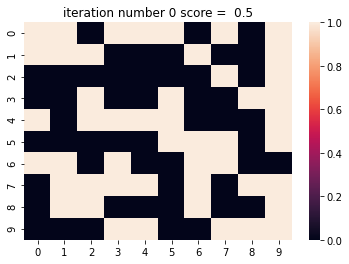

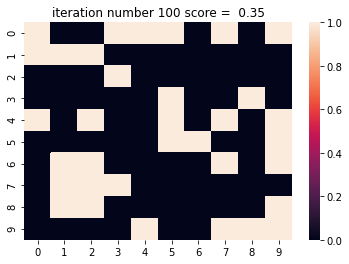

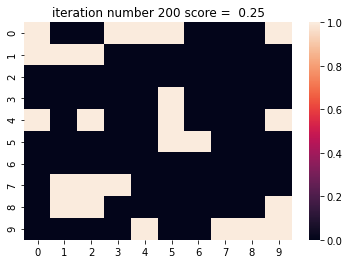

correct is 1
qhat is 0.65
proportion of followers z is 0.95


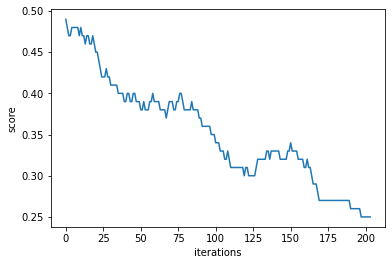

In [645]:
run1=simpleModel()
x=1
correct=1#how come 1 doesn't win?.. maybe because if m is even, ties are counted as 0
ratio=np.unique(run1.raveledGuess,return_counts=True)[1]
score=ratio[correct]/100
i=0
qhat=0.65
z=95
followers=np.random.choice(100,z)
score_keeper=[]

print('correct is '+ str(correct) + '\n'
     'qhat is ' + str(qhat) + '\n'
     'proportion of followers z is '+ str(z/100) ) 
while score<qhat:
# for i in np.arange(10):
#     print(score)
    changeIdx=np.random.choice(followers,size=x)#pick person who is going to look
    picked_idx=np.random.choice(100,size=run1.m,replace=False)
    m_sample=run1.raveledGuess[picked_idx]#what is the sample
#     print(m_sample)
#     print(np.unique(m_sample,return_counts=True))
    winner=np.argmax(np.unique(m_sample,return_counts=True)[1])#find consensus
#     print(winner)
    run1.raveledGuess[changeIdx]=winner#update to winner
    if not(i %100):
        sns.heatmap(run1.raveledGuess.reshape(10,10))
        plt.title('iteration number '+str(i) + ' score =  '+str(score))
        plt.show()
        
    ratio=np.unique(run1.raveledGuess,return_counts=True)[1]
    score=ratio[correct]/100
#     print(ratio)
    i+=1
    
    if score<.25:
        break
    if score==qhat:
        sns.heatmap(run1.raveledGuess.reshape(10,10))
        plt.title('iteration number '+str(i) + ' score =  '+str(score))
        plt.show()
    if i>2500:
        break
    score_keeper.append(score)
plt.plot(score_keeper)
plt.xlabel('iterations')
plt.ylabel('score')

print('correct is '+ str(correct) + '\n'
     'qhat is ' + str(qhat) + '\n'
     'proportion of followers z is '+ str(z/100) ) 

As the proportion of followers increases, the accuracy decreases